# EDA: 50 Startups Data

The goal of this exploratory data analysis is to understand the which factors affect the success of startups by examining the relationship between R&D spending, marketing spending and administration spending with the Profit.

## Data Description

The dataset contains data about 50 startups and provides information about:

1. **`R&D Spending`**: How much each startup spends on Research and Development


2. **`Marketing Spend`**: How much each startup spends on Marketing


3. **`Administration`**: How much each startup spends on Administration Cost


4. **`State`**: Indicates which state the startup is based in (location)


5. **`Profit`**: The profit made by the startup

## Insights

1. R&D Spending and Profit has a strong, positive relationship.

2. Market Spending and Profit has a moderate, positive relationship.


## Disclaimer

- One of the limitation on this data size is the size of the dataset. The observations only represents startup at three major cities in the Unites States, which are New York, California and Florida. 

## Import Packages

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Plotly for interactive visualization
from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)  # require to use ploty offline in jupyter notebook
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import Image     # to produce plotly staic image on Github

#pip install svglib
# Configuration for high resolution for rendered images on notebook
%config InlineBackend.figure_format='retina'

from IPython.display import SVG, display
'''Display markdown formatted output like bold, italic bold, ...'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))
import warnings

warnings.filterwarnings("ignore")

## Load Data

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Data Overview

In [3]:
# Checking the data size
print("# Rows: {}\n# Columns: {}".format(df.shape[0],
                                         df.shape[1]))

# Rows: 50
# Columns: 5


In [4]:
# Checking columns name
print("Columns Name: {}".format(list(df.columns.values)))

Columns Name: ['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']


In [5]:
# Check data types
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [6]:
# Statistical overview of the data
df.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,California,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


- There are 50 records

- Average R&D Spending: $73,721

- Average Marketing Spend: $211,025

- Average Administration: $121,344

- Average Profit: $112,012

In [7]:
df.State.value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

- Startups are based in **New York**, **California**, and **Florida**

In [8]:
# Checking missing value
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# EDA 1: Distribution of Startups across New York, California, and Florida


### Summary:

The dataset is **balanced** design:

- New York: 17 startups
- California: 17 startups
- Florida: 16 startups

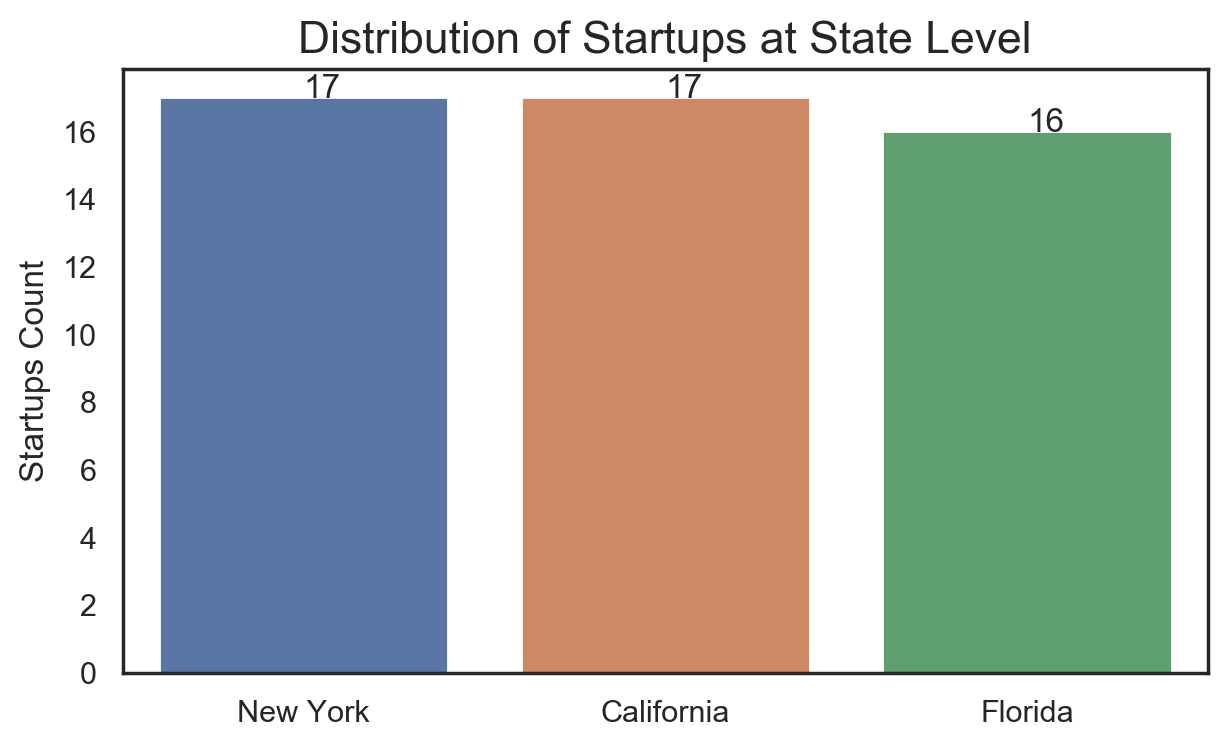

In [105]:
# Prep data: Distribution of startups in each state
state_cnt = df.State.value_counts()        # data for barplot
groupedvalues = state_cnt.reset_index()    # data for label

# Set theme
fig = plt.figure(figsize = (7,4), dpi = 100)
sns.set(style = 'white')

# Plot distribution
fig = sns.barplot(x = state_cnt.index, y = state_cnt.values)
fig.set_title("Distribution of Startups at State Level", fontsize = 16);
fig.set_ylabel("Startups Count", fontsize = 12)

# Add annotation
for index, row in groupedvalues.iterrows():
    fig.text(row.name,row.State, round(row.State,2))

fig.figure.savefig("F1.Distribution of Startups at State Level.png")
plt.show()

# EDA 2: Distribution of Profit at State Level

## Summary:
- Profits in New York, California, and Florida are axpproximately normal distributed.
- According to the plots:
    - most startups in New York made around 100,000 - 150,000
    - most startups in California made less than 50,000 to 150,000
    - most startups in Florida made around 50,000 to 200,000

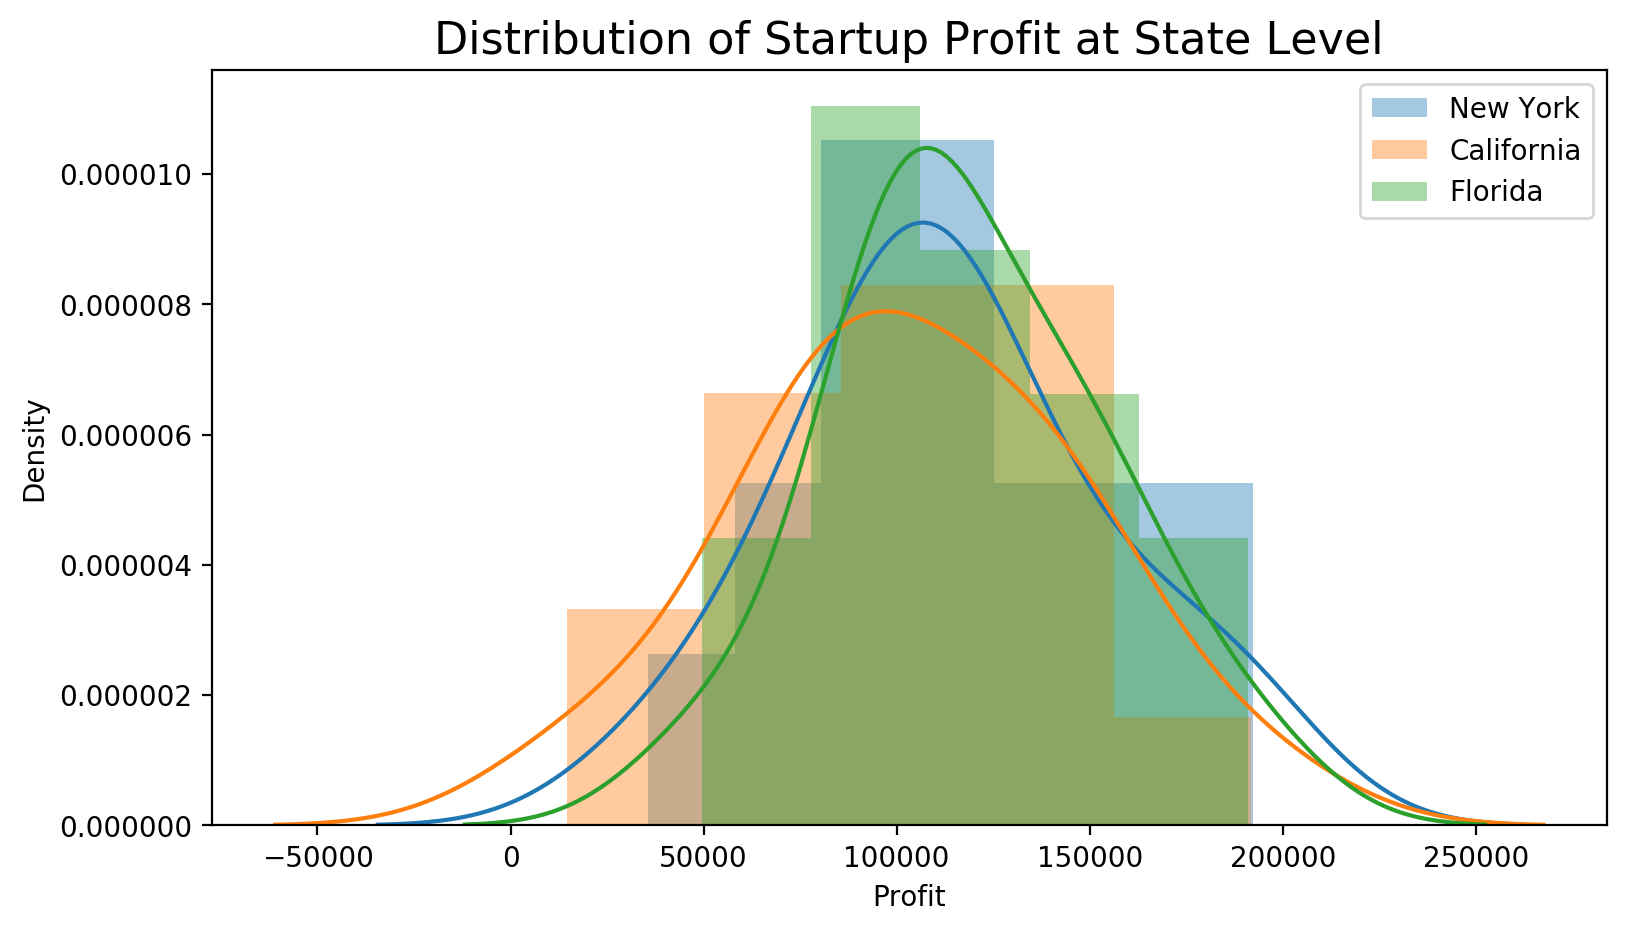

In [10]:
fig =plt.figure(figsize=(9,5), dpi=100)

# Plot Distribution of Profit Across New York, California, and Florida
fig = sns.distplot(df[df['State'] == 'New York']['Profit'], label = "New York")
sns.distplot(df[df['State'] == 'California']['Profit'],label = "California")
sns.distplot(df[df['State'] == 'Florida']['Profit'],label = 'Florida')
plt.title("Distribution of Startup Profit at State Level", fontsize = 16)
plt.legend()
plt.show();
fig.figure.savefig('F2. Distribution of Startup Profit Comparison.png')

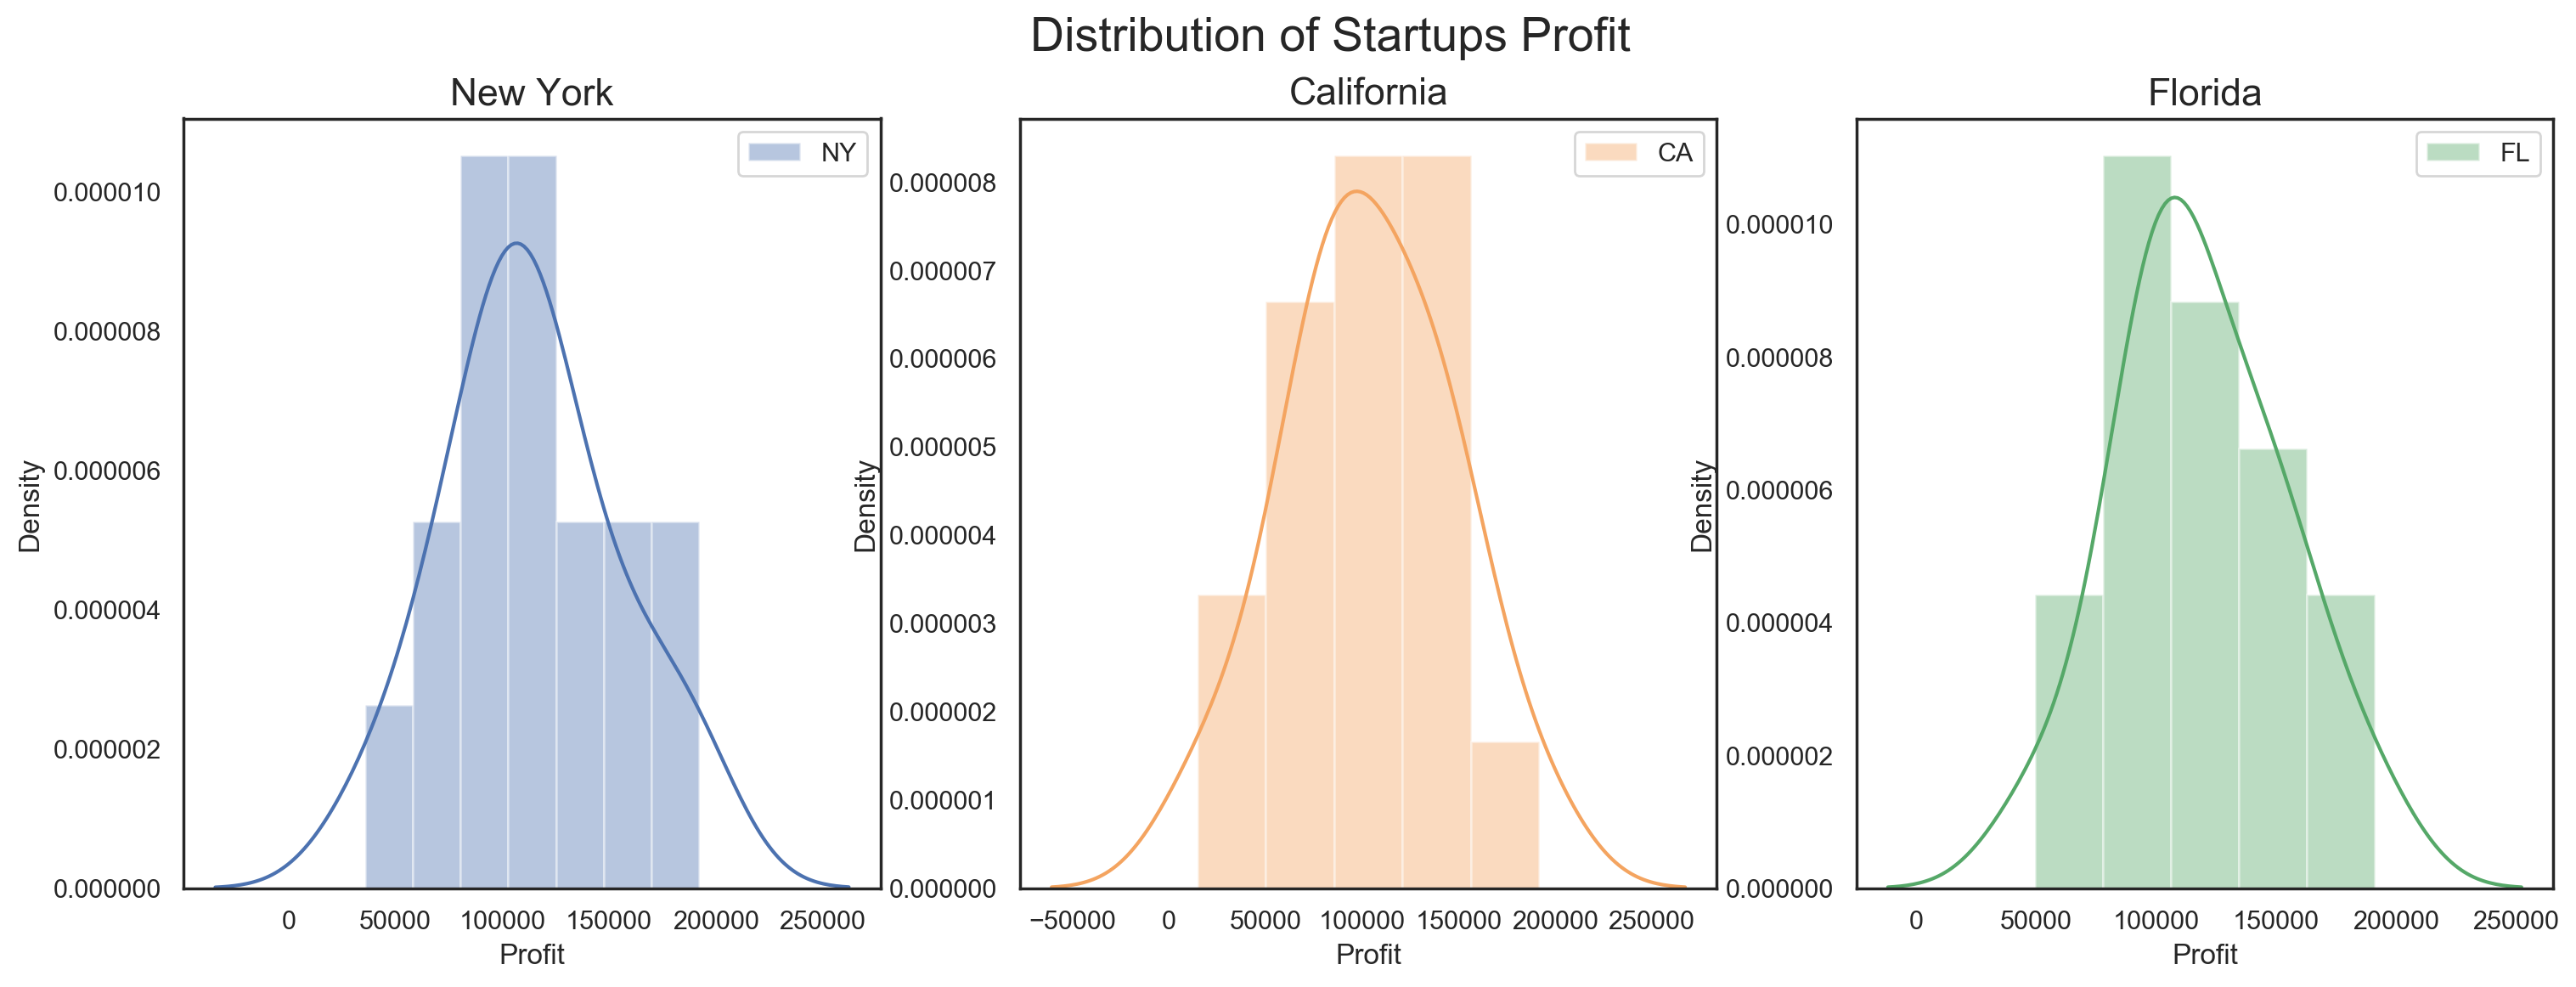

In [11]:
# Distribution in more details
sns.set(style="white")
f, axes = plt.subplots(ncols = 3,
                 figsize = (18,6), dpi = 100)
f.suptitle("Distribution of Startups Profit", fontsize=20)

# Profit distribution of New York
ax = sns.distplot(df[df['State'] == 'New York']['Profit'],
                  label = "NY", color = "b", ax = axes[0])
ax.legend()
ax.set_title('New York', fontsize = 16)
# Profit distribution of California
sns.distplot(df[df['State'] == "California"]['Profit'],
             label = "CA", color = "sandybrown", ax = axes[1])
axes[1].legend()
axes[1].set_title('California', fontsize = 16)
# Profit distribution of Florida
sns.distplot(df[df['State'] == "Florida"]['Profit'],
             label = "FL", color = "g", ax = axes[2])
axes[2].legend()
axes[2].set_title('Florida', fontsize = 16);
f.savefig("F3. Distribution of Startups Profit.png")

In [12]:
df.groupby('State').Profit.mean().sort_values()

State
California    103905.175294
New York      113756.446471
Florida       118774.024375
Name: Profit, dtype: float64

# EDA 3: Distribution of Startups Spending on R&D, Marketing, Administration, and Profit

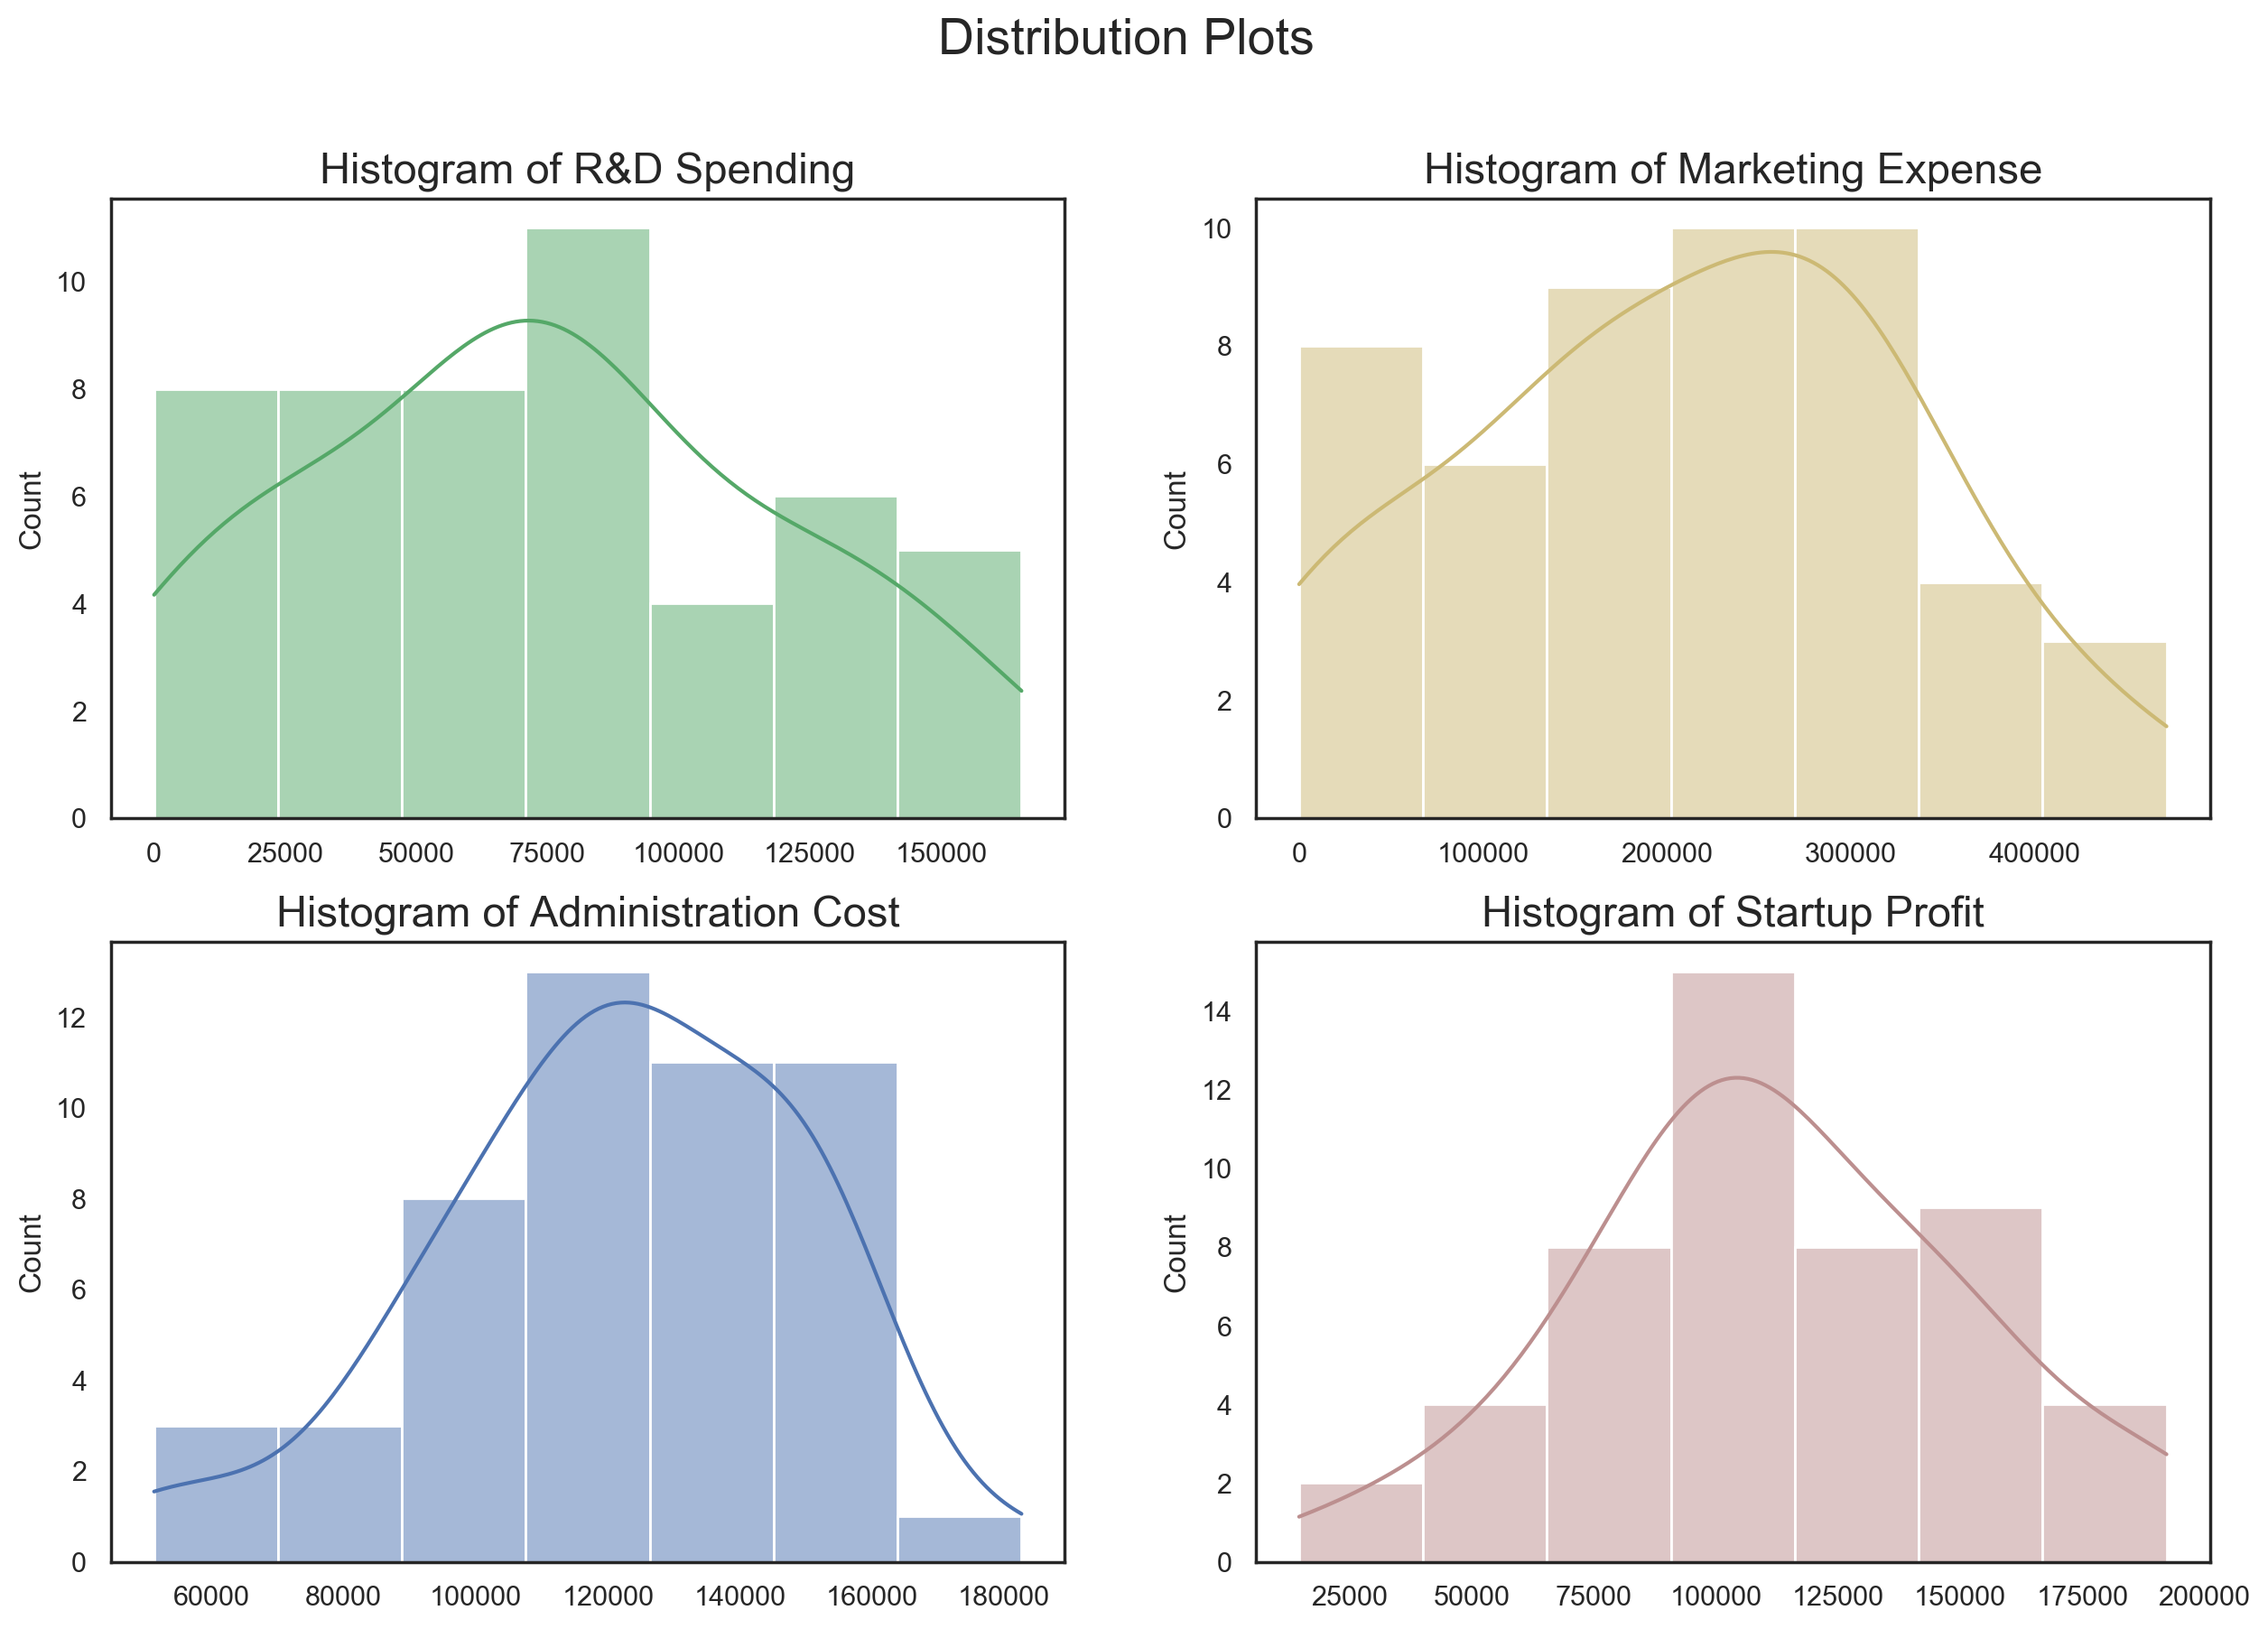

In [13]:
sns.set(style="white")
f, axes = plt.subplots(nrows = 2, ncols = 2,
                 figsize = (15,10), dpi = 100)
# Plot histogram
sns.histplot(data=df, x="R&D Spend", ax=axes[0,0], kde=True, color = "g").set_title('Histogram of R&D Spending', fontsize=17)
axes[0,0].set_xlabel("")
sns.histplot(data=df, x="Marketing Spend", ax=axes[0,1], kde=True, color = "y").set_title('Histogram of Marketing Expense', fontsize=17)
axes[0,1].set_xlabel("")
sns.histplot(data=df, x="Administration", ax=axes[1,0], kde=True, color = "b").set_title('Histogram of Administration Cost', fontsize=17)
axes[1,0].set_xlabel("")
sns.histplot(data=df, x="Profit", ax=axes[1,1], kde=True, color = "rosybrown").set_title('Histogram of Startup Profit', fontsize=17)
axes[1,1].set_xlabel("")
f.suptitle("Distribution Plots", fontsize=20);

<Figure size 864x432 with 0 Axes>

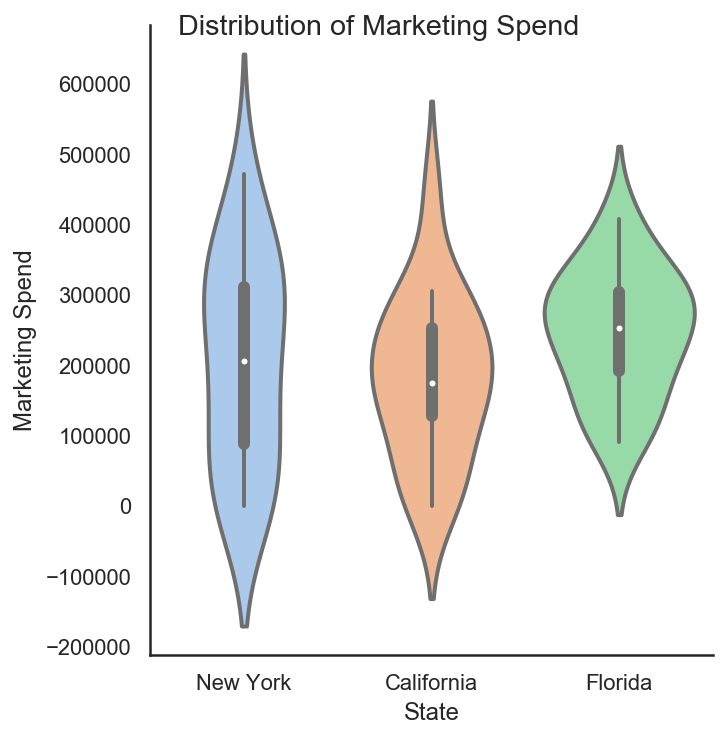

In [14]:
# At state level
plt.figure(figsize=(12,6))
ax = sns.catplot(x="State", y= "Marketing Spend", data = df,
            kind = "violin", size = 5, linewidth=2, palette = "pastel")
ax.fig.suptitle("Distribution of Marketing Spend")
plt.show();

<Figure size 864x432 with 0 Axes>

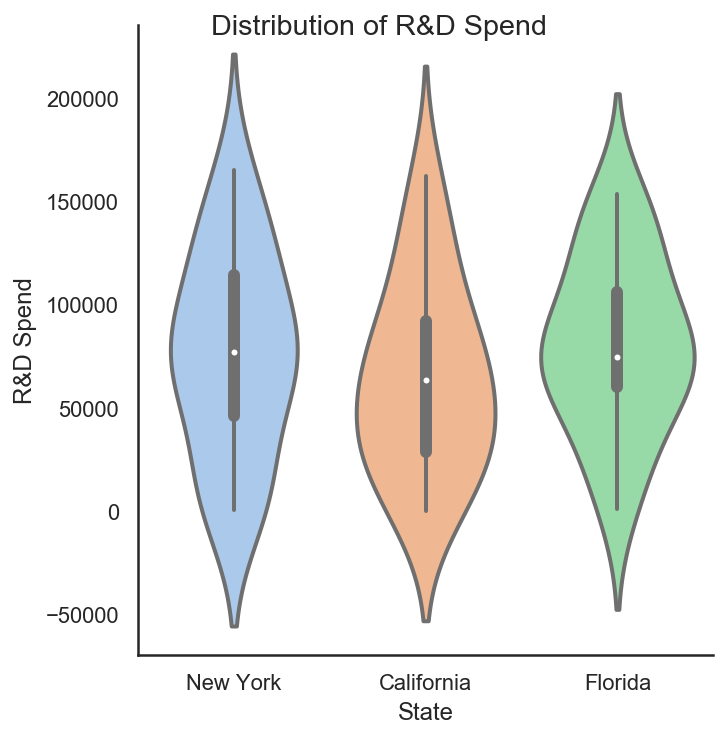

In [15]:
# At state level
plt.figure(figsize=(12,6))
ax = sns.catplot(x="State", y= "R&D Spend", data = df,
            kind = "violin", size = 5, linewidth=2, palette = "pastel")
ax.fig.suptitle("Distribution of R&D Spend");

<Figure size 864x432 with 0 Axes>

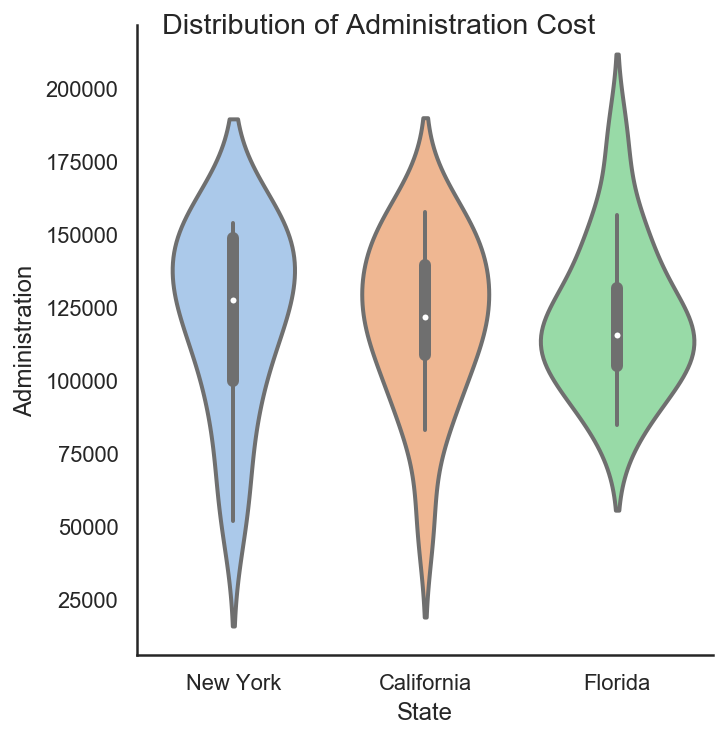

In [16]:
plt.figure(figsize=(12,6))
ax = sns.catplot(x="State", y= "Administration", data = df,
            kind = "violin", size = 5, linewidth=2, palette = "pastel")
ax.fig.suptitle("Distribution of Administration Cost");

<Figure size 864x432 with 0 Axes>

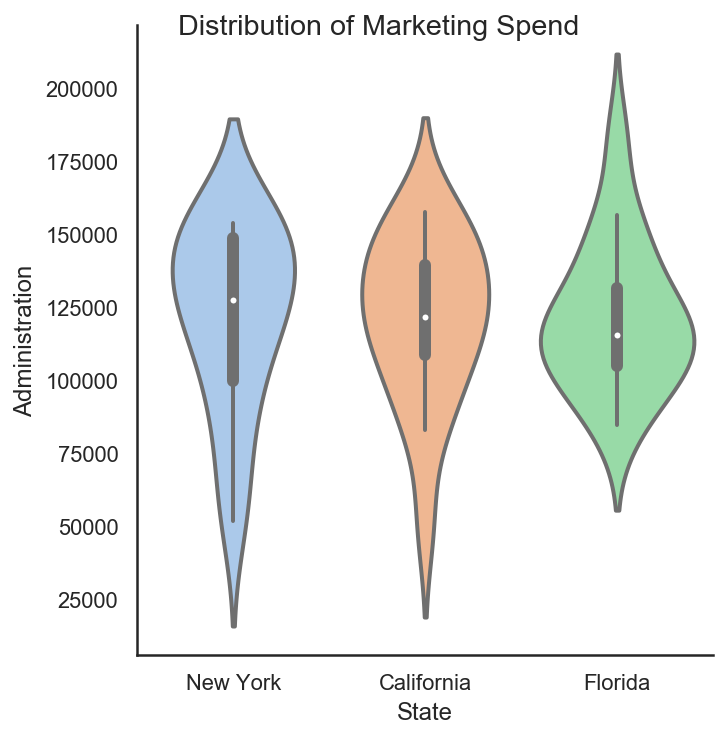

In [17]:
plt.figure(figsize=(12,6))
ax = sns.catplot(x="State", y= "Administration", data = df,
            kind = "violin", size = 5, linewidth=2, palette = "pastel")
ax.fig.suptitle("Distribution of Marketing Spend");

# EDA 4: Correlation

### Summary:

- The correlation of 0.97, which is close to 1, between R&D Spending and Profit demonstratesa strong, positive relationship. The higher investment in R&D a startup has, the higher profit it makes.

- The correlation of 0.72, which is close to 1, between Marketing Spend and Profit demonstratesa strong, positive relationship. The higher investment in Marketing a startup has, the higher profit it makes.

- The correlation of 0.24, which is close to 0, between Administration and Profit demonstrates a weak, positive relationship.

In [18]:
correlation = df.corr()

In [19]:
correlation.style.background_gradient(cmap='coolwarm')

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


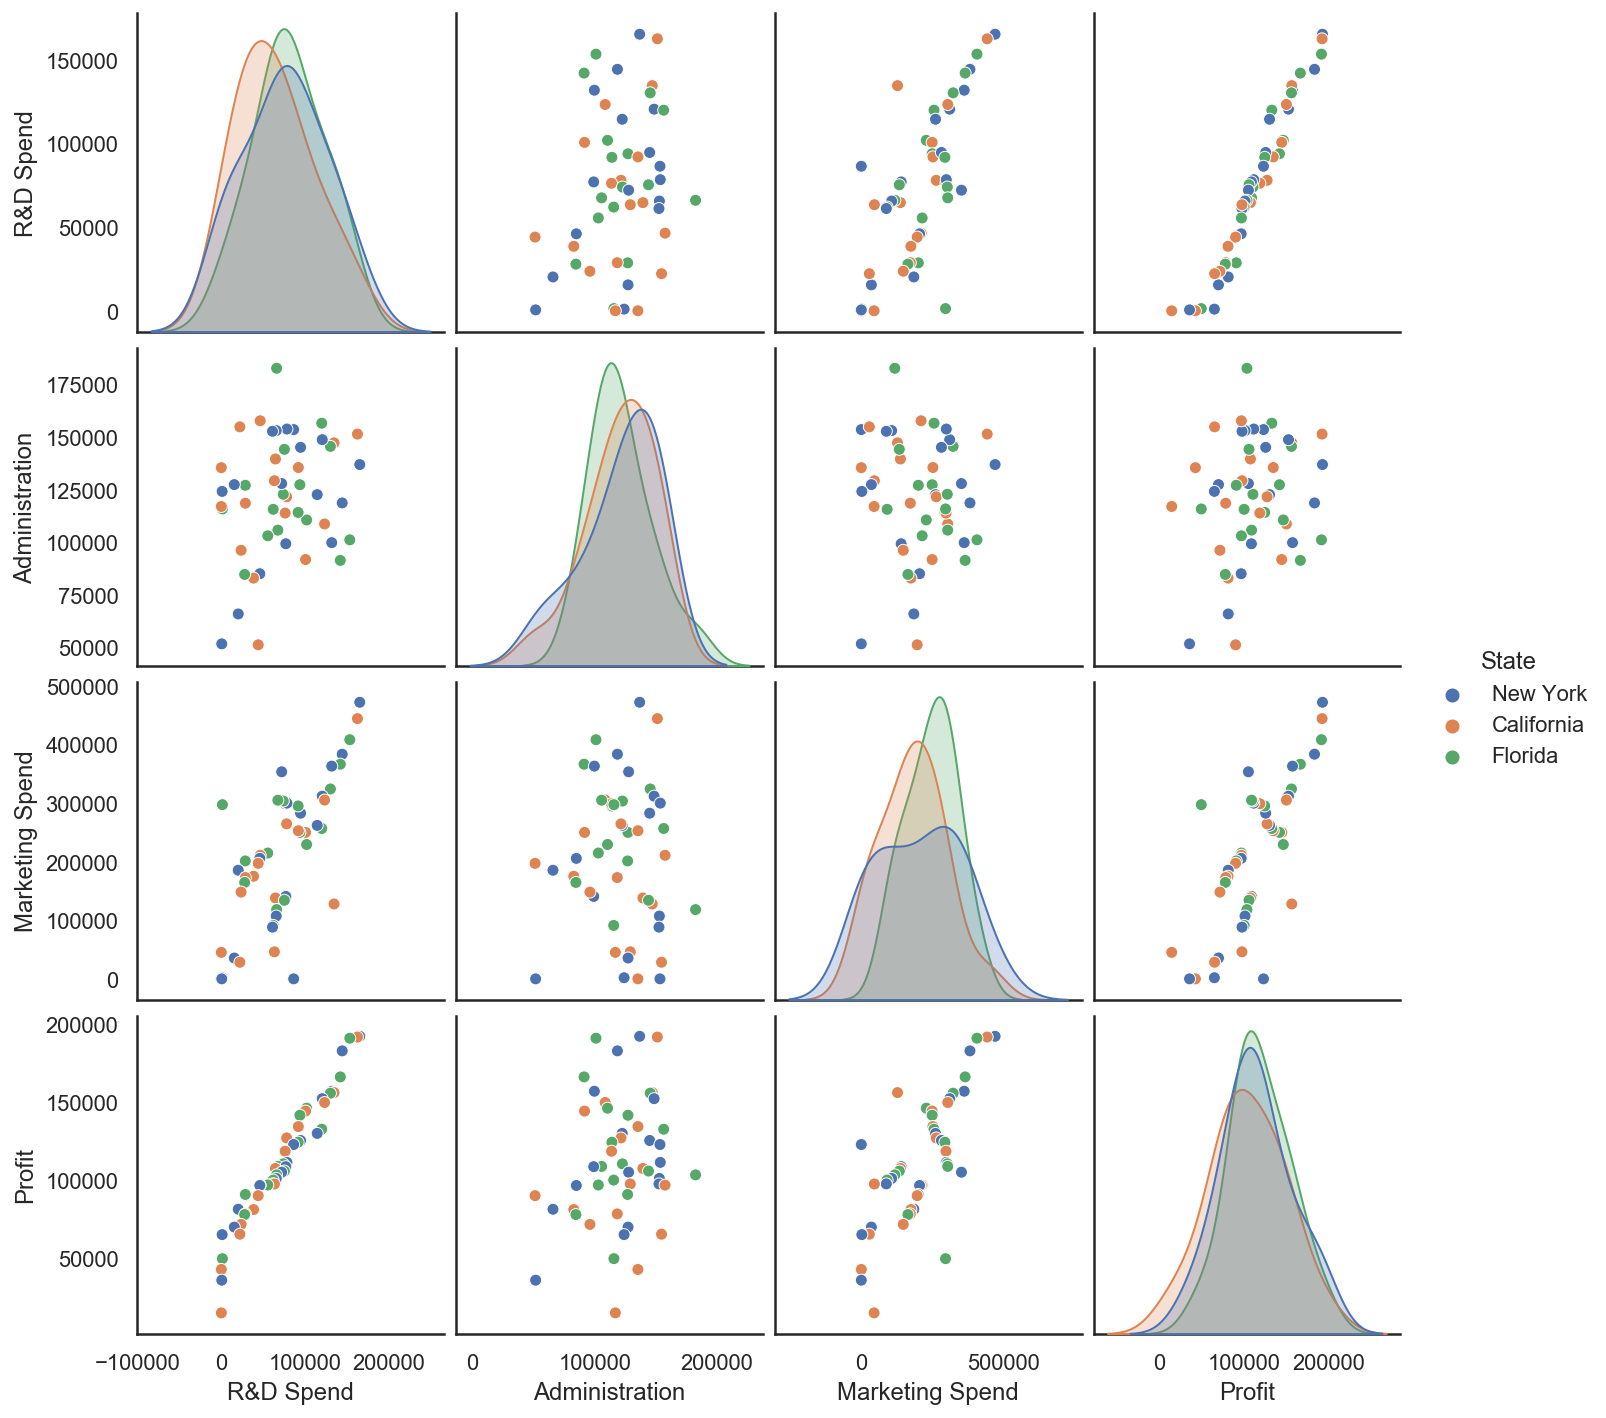

In [20]:
# Correlation matrix
sns.pairplot(df, hue = "State");

# Linear Regression Modeling

In [30]:
from statsmodels.api import OLS

In [31]:
X = df[['R&D Spend','Marketing Spend']]
y = df['Profit']

In [34]:
model = OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              550.4
Date:                Fri, 05 Mar 2021   Prob (F-statistic):                    8.02e-34
Time:                        21:11:34   Log-Likelihood:                         -575.87
No. Observations:                  50   AIC:                                      1156.
Df Residuals:                      48   BIC:                                      1160.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.9781      0.108      9.026      0.000       0.760       1.196
Marketing Spend     0.1375      0.039      3.563      0.001       0.060       0.215
==============================================================================
Omnibus:                        0.664   Durbin-Watson:                   0.628
Prob(Omnibus):                  0.718   Jarque-Bera (JB):                0.715
Skew:                          -0.043   Prob(JB):                        0.700
Kurtosis:                       2.420   Cond. No.                         8.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
print(results.t_test([1,0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.9781      0.108      9.026      0.000       0.760       1.196
